In [1]:
from click import style
from datasets import load_dataset

# from LinkedInLearning_ML.Clustering.algos import max_clusters

electricity = load_dataset('inria-soda/tabular-benchmark', data_files='clf_num/electricity.csv')

In [2]:
print(dir(electricity['train']))

['_TF_DATASET_REFS', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getitems__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_build_local_temp_path', '_check_index_is_initialized', '_data', '_estimate_nbytes', '_fingerprint', '_format_columns', '_format_kwargs', '_format_type', '_generate_tables_from_cache_file', '_generate_tables_from_shards', '_get_cache_file_path', '_get_output_signature', '_getitem', '_indexes', '_indices', '_info', '_map_single', '_new_dataset_with_indices', '_output_all_columns', '_push_parquet_shards_to_hub', '_save_to_disk_single', '_select_contiguous', '_select_with_indices_mapping', '_split', 'add_colum

In [3]:
elec = electricity['train'].to_pandas()
elec.head()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.898987,0.957447,0.068632,0.568283,0.004456,0.456499,0.644737,DOWN
1,0.867616,0.234043,0.033716,0.337102,0.001672,0.329622,0.846930,DOWN
2,0.009159,0.255319,0.059175,0.185808,0.003467,0.422915,0.414912,DOWN
3,0.898987,0.531915,0.087577,0.539572,0.004936,0.637752,0.491667,DOWN
4,0.868280,0.085106,0.027021,0.165129,0.001271,0.265924,0.748246,DOWN


In [4]:
X = elec.drop(columns=['class'])
X.tail()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer
38469,0.9158,0.404255,0.077549,0.456263,0.005332,0.378560,0.356140
38470,0.9158,0.425532,0.074397,0.444213,0.005110,0.377525,0.369737
38471,0.9158,0.468085,0.072835,0.423386,0.005019,0.354480,0.380263
38472,0.9158,0.829787,0.065420,0.353913,0.004508,0.319524,0.319737
38473,0.9158,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

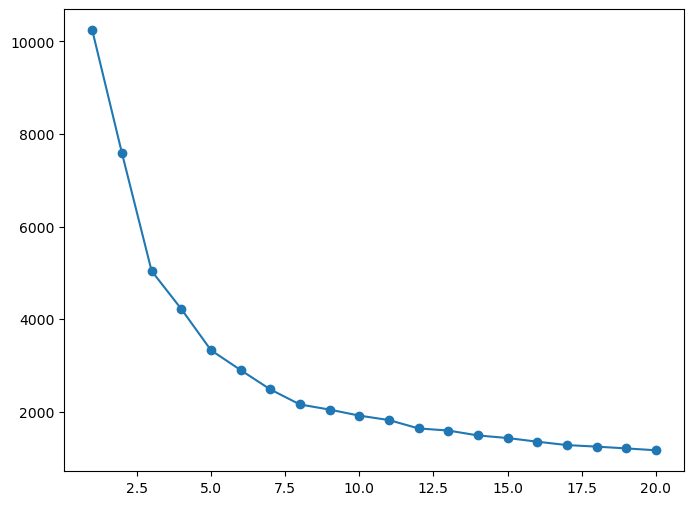

In [6]:
inertias = []
max_clusters = 20

for i in range(max_clusters):
    km = KMeans(n_clusters=i+1, n_init='auto', max_iter=300, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(range(1, max_clusters+1), inertias, marker='o')

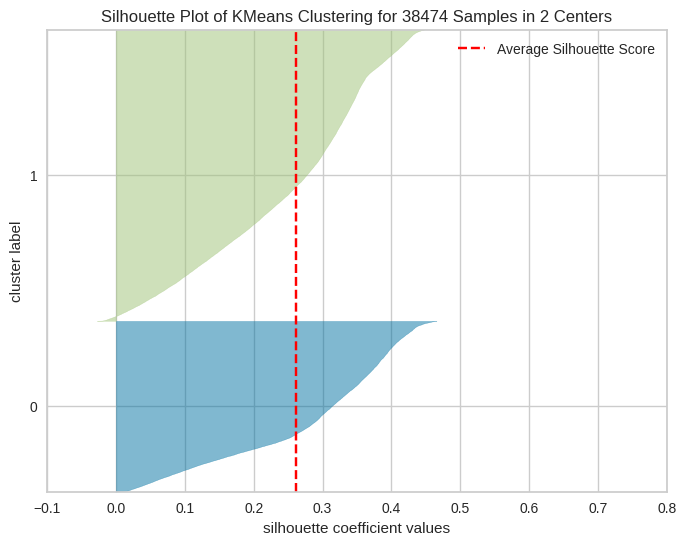

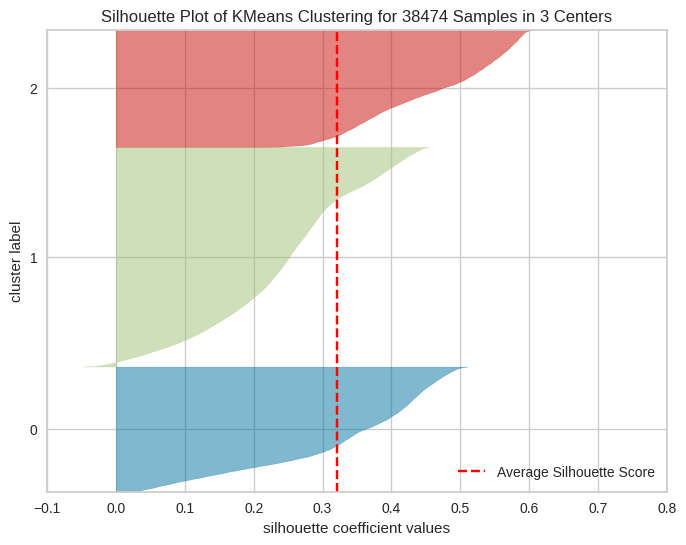

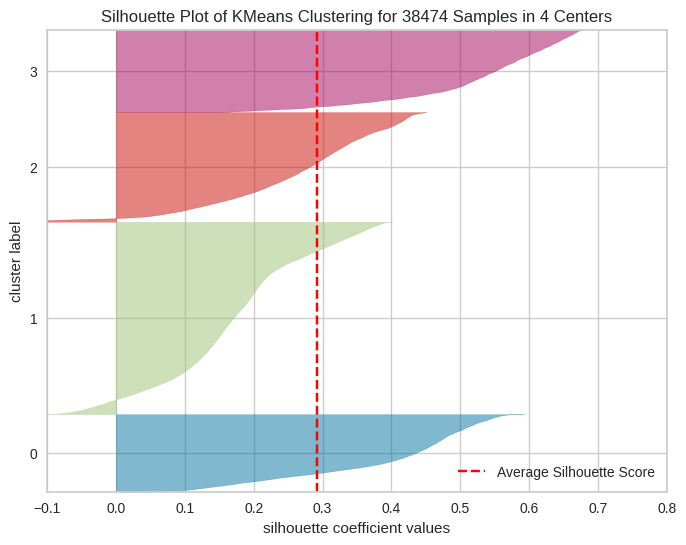

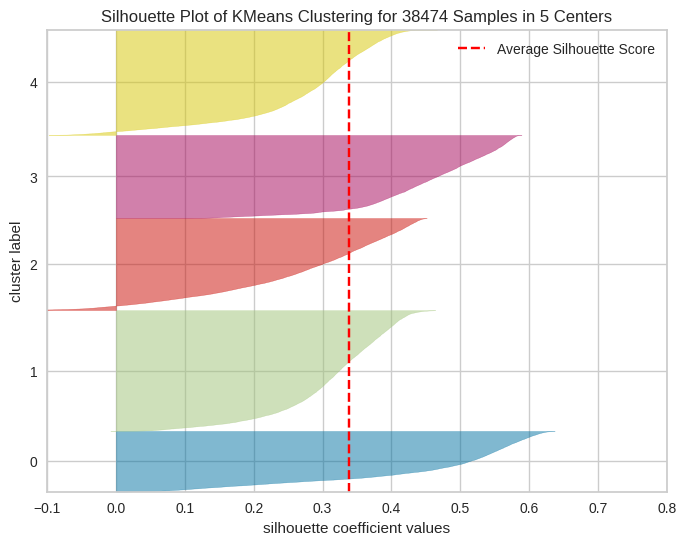

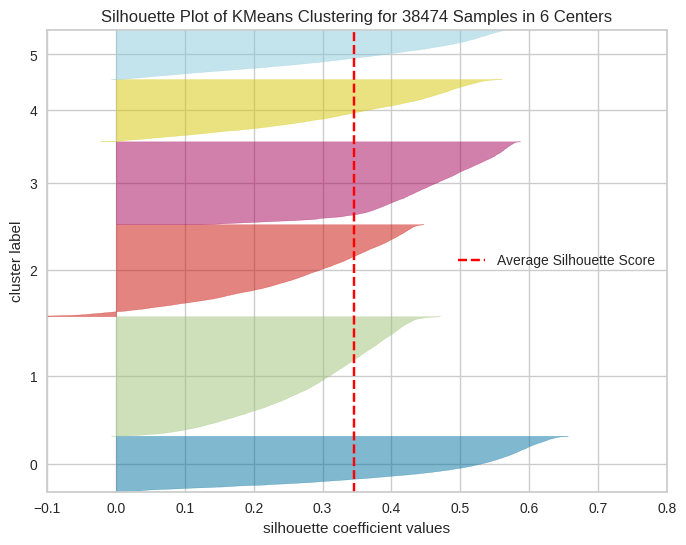

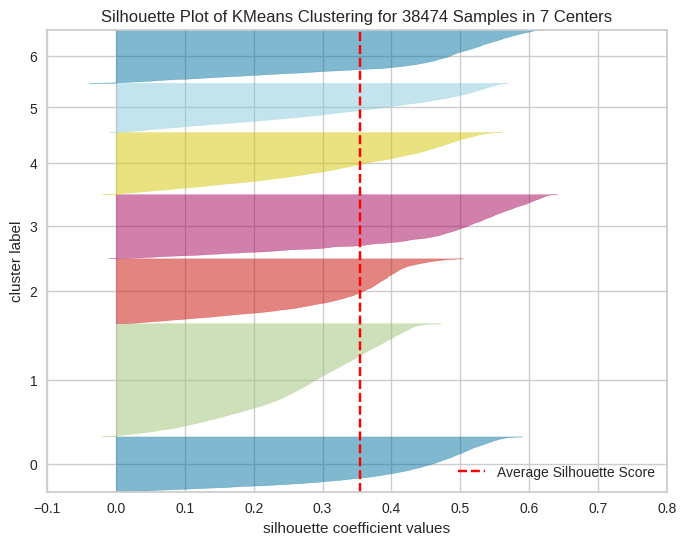

In [7]:
from yellowbrick.cluster import silhouette_visualizer

max_clusters = 6
for i in range(max_clusters):
    km = KMeans(n_clusters=i+2, n_init='auto', max_iter=300, random_state=42)

    fig, ax = plt.subplots(figsize=(8, 6))
    viz = silhouette_visualizer(km, X, colors='yellowbrick', ax=ax, show=False)
    ax.set_xlim([-0.1, .8])

In [8]:
km = KMeans(n_clusters=5, n_init='auto', max_iter=300, random_state=42)
km.fit(X)
label = km.predict(X)
(elec
 .assign(cluster=label)
 .groupby('cluster')
 .agg('mean', numeric_only=True)
 .T
 .style
 .background_gradient(cmap='RdBu', axis='columns')
)

cluster,0,1,2,3,4
date,0.887881,0.449859,0.289463,0.016236,0.892885
period,0.206473,0.671091,0.163150,0.652753,0.678055
nswprice,0.045310,0.059600,0.050946,0.078439,0.063094
nswdemand,0.310528,0.499305,0.276622,0.484675,0.529125
vicprice,0.002687,0.004014,0.002967,0.003467,0.004172
vicdemand,0.327880,0.447320,0.376267,0.422915,0.510550
transfer,0.679200,0.461236,0.484567,0.414912,0.509617


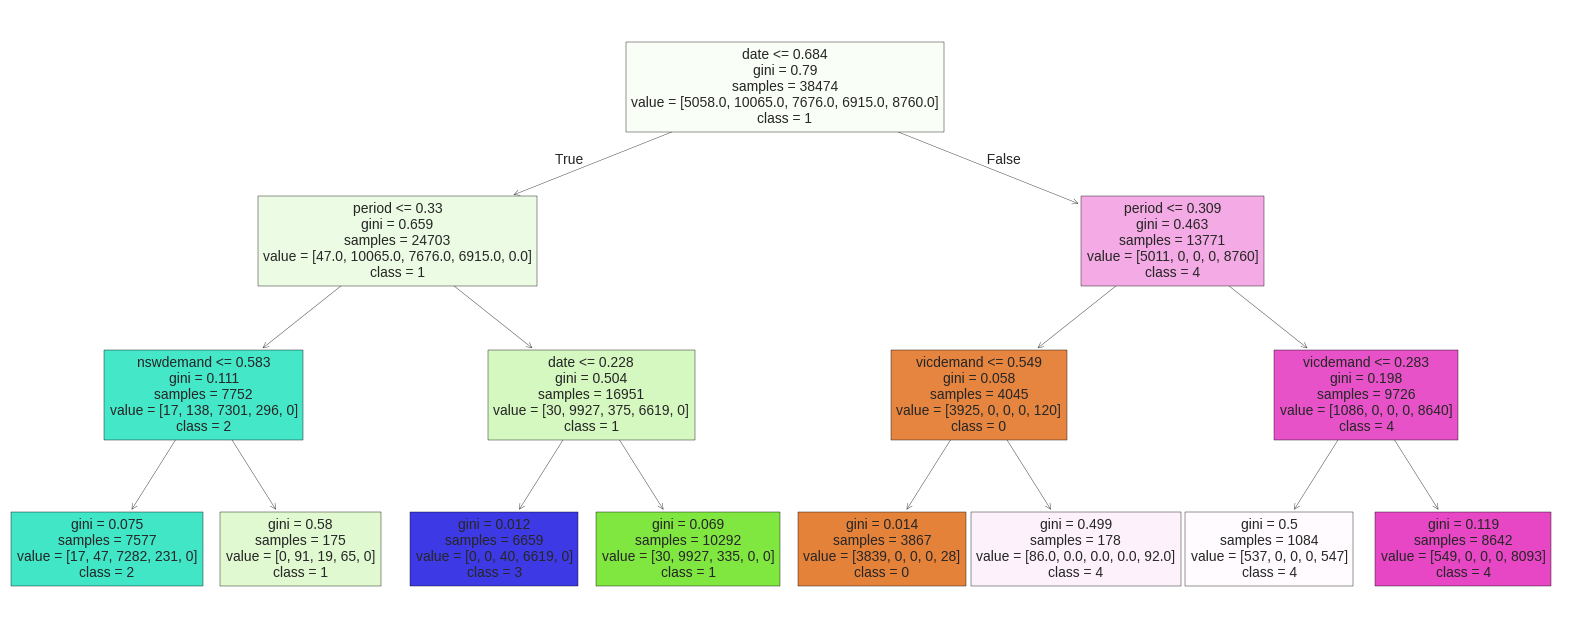

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, label)

from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 8))

class_names = [str(i) for i in range(0, 5)]
_ = plot_tree(dt, feature_names=X.columns, class_names=class_names,filled=True, fontsize=10)